## Importing necessary libraries and data

In [22]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.patches import ConnectionPatch
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud
#data = read_csv('B1X3-Orientation_MLAI_vinchinois_4-27-2023_8_56.csv')
#print(dt)

In [3]:
data = pd.read_excel('BX3-Orientation_MLAI_vinchinois_4-27-2023_8_57.xlsx', sheet_name='MLAI_vinchinois')

## Checking the data 

In [83]:
# shape of our data (5110 rows and 12 column)
data.shape

(75, 41)

In [84]:
# counting the values of each level from the gender column.
data["1_Civilisation"].value_counts(normalize=False)

Femme    37
Homme    36
Name: 1_Civilisation, dtype: int64

In [85]:
PieData = pd.DataFrame(data["1_Civilisation"].value_counts(normalize=False))

In [86]:
PieData

,1_Civilisation
Femme,37
Homme,36


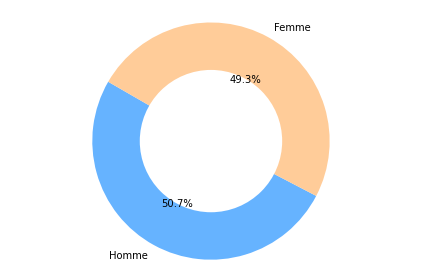

In [87]:
#Checking the percentages of stroke and no-stroke 
PieData = pd.DataFrame(data["1_Civilisation"].value_counts(normalize=False))

labels=['Homme','Femme']
colors = ['#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(PieData['1_Civilisation'], colors = colors, labels=labels, autopct='%1.1f%%', startangle=150)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [88]:
région = pd.DataFrame(data["5_Region"].value_counts(normalize=False))
région

,5_Region
Région de l'Est (Huadong),28
Région du Sud-ouest (Xi'nan),16
Région du Sud-centre (Zhongnan),9
Région du Nord (Huabei),8
Région du Nord-Est (Dongbei),5
Etrangers,4
Région du Nord-ouest (Xibei),3
Région du Centre (Huazhong),2


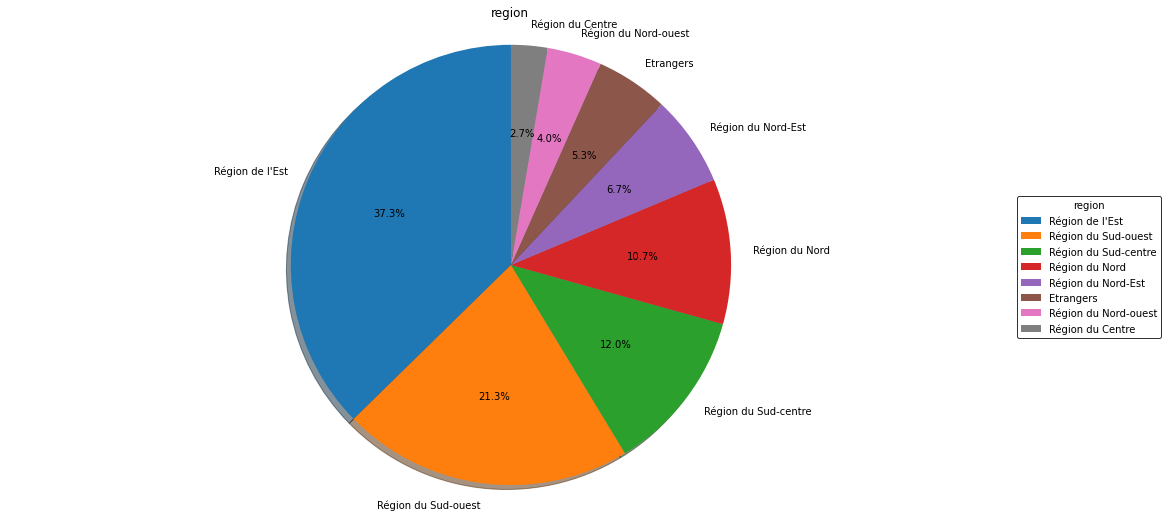

In [89]:
fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))
labels = "Région de l'Est", "Région du Sud-ouest", "Région du Sud-centre","Région du Nord","Région du Nord-Est" ,"Etrangers","Région du Nord-ouest","Région du Centre"

sizes = [28,16,9,8,5,4,3,2]
#explode = (0, 0)
ax.set_title("region")
ax.pie(sizes ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
#plt.title("\nStroke Patient's Gender",fontsize=25)
ax.legend(labels, title="region",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")



In [90]:
fréquance = pd.DataFrame(data["24_frequence"].value_counts(normalize=False))
fréquance

,24_frequence
Il y a quelques jours,22
Il y a des semaine,19
"Hier, ou maintenant !",12
Il y a un an ou plus que an ans.,8
Il y a des mois,6
Jamais,5
Il y a demi ans.,3


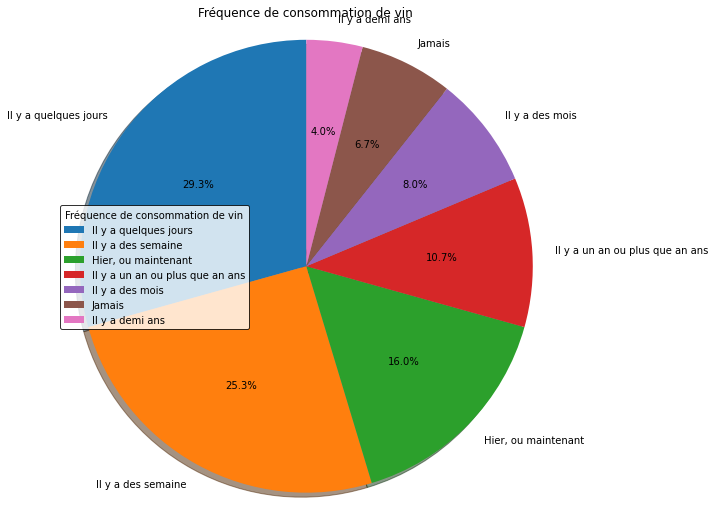

In [91]:
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
labels = "Il y a quelques jours", "Il y a des semaine", "Hier, ou maintenant","Il y a un an ou plus que an ans","Il y a des mois" ,"Jamais","Il y a demi ans"

sizes = [22,19,12,8,6,5,3]
#explode = (0, 0)
ax.set_title("Fréquence de consommation de vin")
ax.pie(sizes ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
#plt.title("\nStroke Patient's Gender",fontsize=25)
ax.legend(labels, title="Fréquence de consommation de vin",loc="center left",bbox_to_anchor=(0, 0,0.5,1), edgecolor = "black")

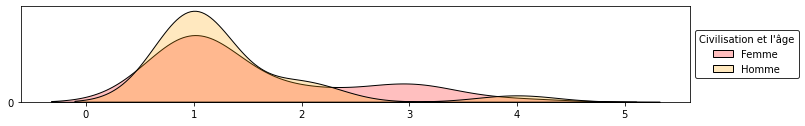

In [102]:
fig, ax2 = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
labels2 = ['Femme','Homme']
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
Femme = pd.DataFrame(data[(data["1_Civilisation"] == "Homme")])
Homme = pd.DataFrame(data[(data["1_Civilisation"] == "Femme")])
sns.kdeplot(Femme["3_Age"], ax=ax2,color="red", ec='black',shade=True, label="Homme")
sns.kdeplot(Homme["3_Age"], ax=ax2, color="orange",ec='black', shade=True, label="Femme")
#ax2.text(-0.06, 0.09, 'BMI',fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.legend(labels2, title="Civilisation et l'âge",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")
#l’âge
#1 = 18-29
#2 = 30-39
#3 = 40-49
#4 = 50 +


In [103]:
# Question 6
savoir = pd.DataFrame(data["6_OrigineDomaine"].value_counts(normalize=False))
savoir

,6_OrigineDomaine
Non,53
Oui,13
Je ne sais pas,9


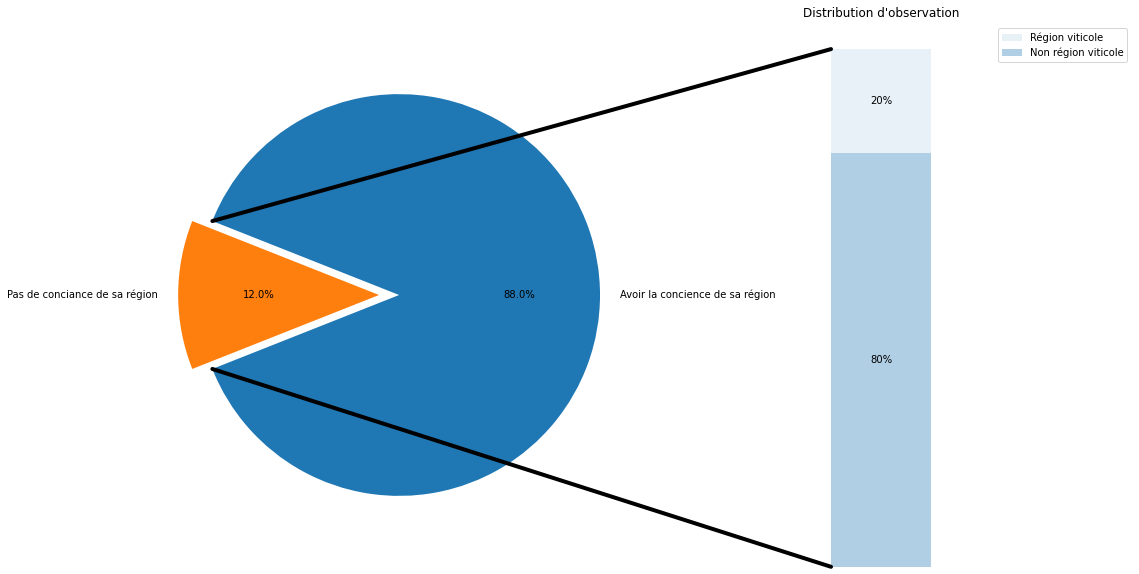

In [113]:
labels = "Non","Oui","Pas de Concience"

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.88, .12]
labels = ['Avoir la concience de sa région', 'Pas de conciance de sa région']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.80, .20]
age_labels = ['Non région viticole', 'Région viticole']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Distribution d'observation")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [132]:
ciyun1 = pd.DataFrame(data["8_VinNation"].value_counts(normalize=False))
ciyun1

,8_VinNation
NingXia,11
ShanDong,11
XinJiang,11
GanSu,4
HeBei,3
GuiZhou,1
YunNan,1


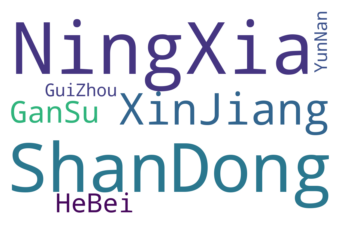

In [138]:
ciyun1 = data['8_VinNation'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(ciyun1)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [144]:
ciyun3 = pd.DataFrame(data["10_bas_gamme"].value_counts(normalize=False))
ciyun3

,10_bas_gamme
"< RMB 100 (14,29€)",34
"< RMB 200 (28,57€)",23
"< RMB 50 (7,14€)",7
"< RMB 300 (42,86€)",4
"< RMB 1000 (142,86€)",3
"< RMB 500 (71,43€)",2


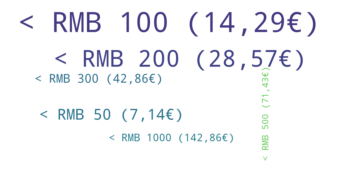

In [150]:
ciyun3 = data['10_bas_gamme'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1600, height=800, background_color='white')

wc.generate_from_frequencies(ciyun3)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
conda install -c conda-forge wordcloud #第一次运行下载这个

In [142]:
ciyun2 = pd.DataFrame(data["9_VinImport"].value_counts(normalize=False))
ciyun2

,9_VinImport
France,65
Espagne,2
Australie,1
Belgique,1
Italy,1
Francais,1
Italie,1


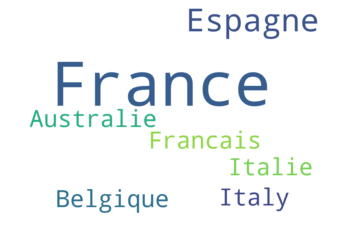

In [143]:
ciyun2 = data['9_VinImport'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(ciyun2)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [151]:
#Moyenne gamme
Moyennegmmme = pd.DataFrame(data["11_milieu_gamme"].value_counts(normalize=False))
Moyennegmmme

,11_milieu_gamme
"< RMB 300 (42,86€)",30
"< RMB 200 (28,57€)",20
"< RMB 500 (71,43€)",19
"< RMB 1000 (142,86€)",4
"< RMB 100 (14,29€)",2


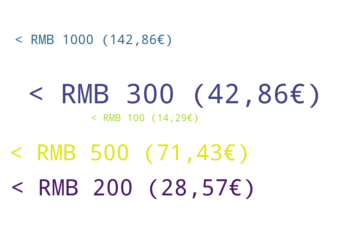

In [173]:
Moyennegmmme = data['11_milieu_gamme'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [174]:
#haut gamme
haut_gamme = pd.DataFrame(data["12_haut_gamme"].value_counts(normalize=False))
haut_gamme

,12_haut_gamme
"< RMB 1000 (142,86€)",38
"< RMB 500 (71,43€)",17
"< RMB 300 (42,86€)",15
"< RMB 200 (28,57€)",2
"< RMB 100 (14,29€)",1


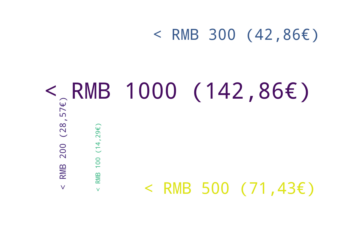

In [182]:
Moyennegmmme = data['12_haut_gamme'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [183]:
#13_grand_cru
grand = pd.DataFrame(data["13_grand_cru"].value_counts(normalize=False))
grand

,13_grand_cru
milieu de gamme,45
haut de gamme,24
Bas de gamme,6


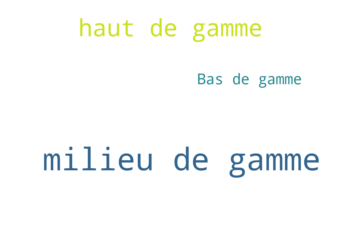

In [184]:
Moyennegmmme = data['13_grand_cru'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
#SatisPub
satisfait = pd.DataFrame(data["14_SatisPub"].value_counts(normalize=False))
satisfait

,14_SatisPub
Plutôt pas content,34
Plûtot content,21
Pas du tout,14
Tout à fait,4


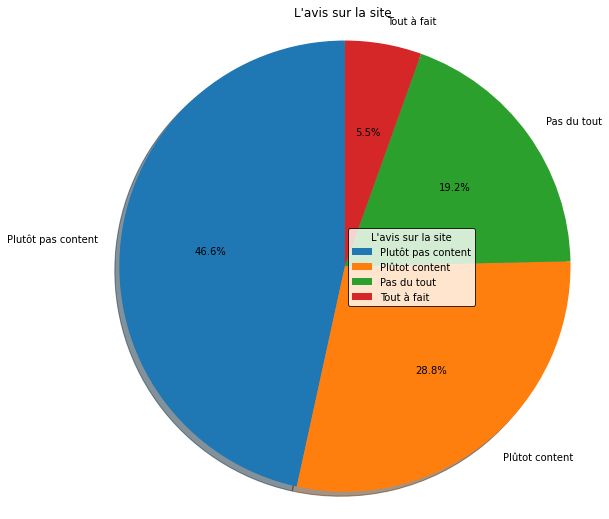

In [13]:
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
labels = "Plutôt pas content", "Plûtot content", "Pas du tout","Tout à fait"

sizes = [34,21,14,4]
#explode = (0, 0)
ax.set_title("L'avis sur la site")
ax.pie(sizes ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
#plt.title("\nStroke Patient's Gender",fontsize=25)
ax.legend(labels, title="L'avis sur la site",loc="center left",bbox_to_anchor=(0.5, 0,0.5,1), edgecolor = "black")

In [14]:
#SatisPub
q15 = pd.DataFrame(data["15_prixpub"].value_counts(normalize=False))
q15

,15_prixpub
"< ¥ 200 (28,57€)",19
"< ¥ 150 (21,43€)",19
"< ¥ 100 (14,29€)",14
"< ¥ 250 (35,71€)",9
"< ¥ 500 (71,43€)",7
"< ¥ 50 (7,14€)",2
"> ¥ 500 (71,43€)",2


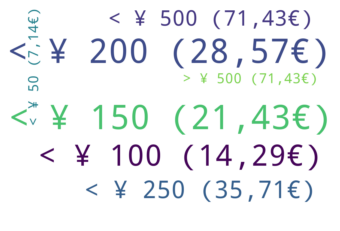

In [23]:
Moyennegmmme = data['15_prixpub'].dropna().value_counts(normalize=False).to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
#Q18
q18 = pd.DataFrame(data["18_FondPhoto"].value_counts(normalize=False))
q18

,18_FondPhoto
Oui,55
Non,20


In [66]:
HommeOui = len(data[(data["1_Civilisation"] == "Femme") & (data["18_FondPhoto"] == "Oui")])#27
HommeNon = len(data[(data["1_Civilisation"] == "Femme") & (data["18_FondPhoto"] == "Non")])#10
FemmeOui = len(data[(data["1_Civilisation"] == "Homme") & (data["18_FondPhoto"] == "Oui")])#26
FemmeNon = len(data[(data["1_Civilisation"] == "Homme") & (data["18_FondPhoto"] == "Non")])#10

In [67]:
FemmeNon

10

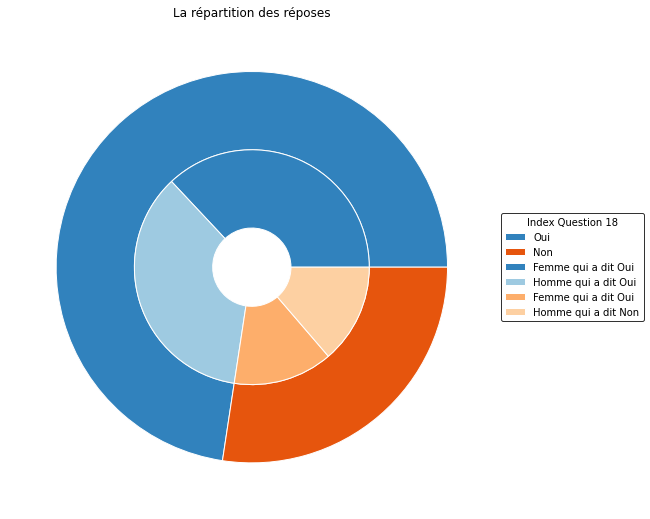

In [68]:
labels1 = ('Oui', 'Non', 'Femme qui a dit Oui', 'Homme qui a dit Oui' , 'Femme qui a dit Oui', 'Homme qui a dit Non')
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
size = 0.4
vals = np.array([[HommeOui, FemmeOui], [HommeNon, FemmeNon]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([0, 2, 6, 7])

ax1.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title="La répartition des réposes")
ax1.legend(labels1, title="Index Question 18",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")


In [69]:
#Q19
q19 = pd.DataFrame(data["19_AppaGout"].value_counts(normalize=False))
HommeOui = len(data[(data["1_Civilisation"] == "Femme") & (data["19_AppaGout"] == "Oui")])#15
HommeNon = len(data[(data["1_Civilisation"] == "Femme") & (data["19_AppaGout"] == "Non")])#22
FemmeOui = len(data[(data["1_Civilisation"] == "Homme") & (data["19_AppaGout"] == "Oui")])#6
FemmeNon = len(data[(data["1_Civilisation"] == "Homme") & (data["19_AppaGout"] == "Non")])#30

In [70]:
q19

,19_AppaGout
Non,53
Oui,22


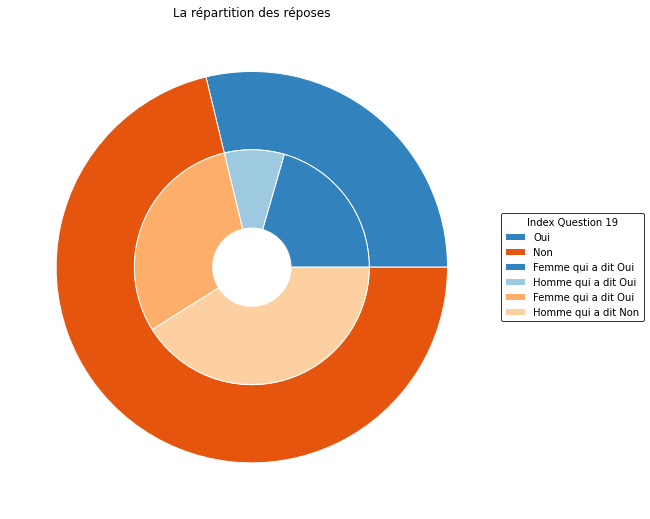

In [71]:
labels1 = ('Oui', 'Non', 'Femme qui a dit Oui', 'Homme qui a dit Oui' , 'Femme qui a dit Oui', 'Homme qui a dit Non')
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
size = 0.4
vals = np.array([[HommeOui, FemmeOui], [HommeNon, FemmeNon]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([0, 2, 6, 7])

ax1.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title="La répartition des réposes")
ax1.legend(labels1, title="Index Question 19",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")


In [72]:
#20_MondeouChinois
q20 = pd.DataFrame(data["20_MondeouChinois"].value_counts(normalize=False))
HommeOui = len(data[(data["1_Civilisation"] == "Femme") & (data["20_MondeouChinois"] == "Oui")])#15
HommeNon = len(data[(data["1_Civilisation"] == "Femme") & (data["20_MondeouChinois"] == "Non")])#22
FemmeOui = len(data[(data["1_Civilisation"] == "Homme") & (data["20_MondeouChinois"] == "Oui")])#6
FemmeNon = len(data[(data["1_Civilisation"] == "Homme") & (data["20_MondeouChinois"] == "Non")])#30

In [73]:
HommeOui#29
HommeNon#7
FemmeOui#23
FemmeNon#13
q20

,20_MondeouChinois
Oui,53
Non,21


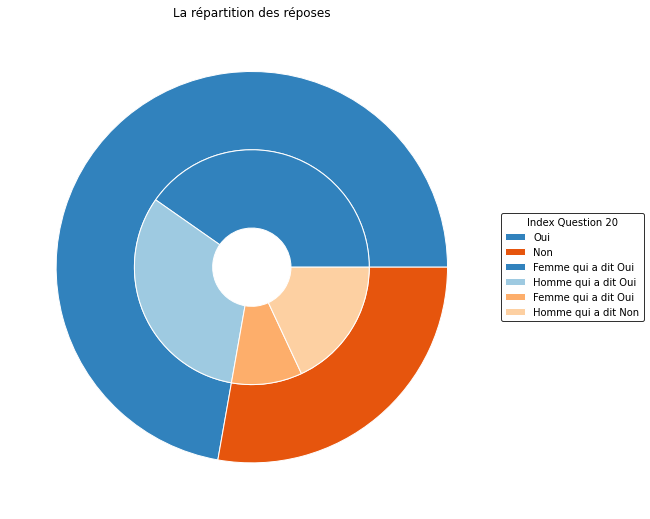

In [74]:
labels1 = ('Oui', 'Non', 'Femme qui a dit Oui', 'Homme qui a dit Oui' , 'Femme qui a dit Oui', 'Homme qui a dit Non')
#fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
size = 0.4
vals = np.array([[HommeOui, FemmeOui], [HommeNon, FemmeNon]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([0, 2, 6, 7])

ax1.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title="La répartition des réposes")
ax1.legend(labels1, title="Index Question 20",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")


In [75]:
#Question 25
split_data = data['25_canaux_achat'].str.split(';')

# 将每个列表元素拆分成一个单独的行
exploded_data = split_data.explode()

# 统计每个单词的出现次数
word_counts = exploded_data.value_counts()

In [76]:
word_counts

Autre     45
Taobao    20
Tmall     13
JD        13
Wechat    10
TikTok     2
QQ         1
Name: 25_canaux_achat, dtype: int64

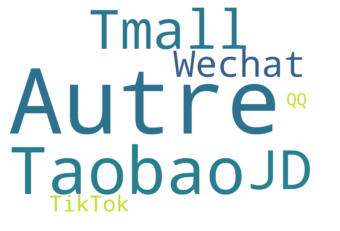

In [78]:
Moyennegmmme = word_counts.to_dict()
wc = WordCloud(width=1200, height=800, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [79]:
# Question 27
split_data = data['27_modivation'].str.split(';')

# 将每个列表元素拆分成一个单独的行
exploded_data = split_data.explode()

# 统计每个单词的出现次数
word_counts = exploded_data.value_counts()
word_counts

Achetez et buvez pour vous-même    61
Cadeaux                            28
Apprentissage et éducation         11
Collection ou investissement       10
Autre                               5
Name: 27_modivation, dtype: int64

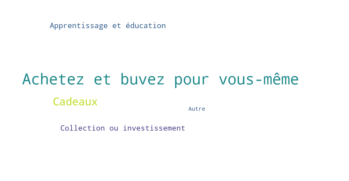

In [94]:
Moyennegmmme = word_counts.to_dict()
wc = WordCloud(width=1200, height=600, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
# Question 29
split_data = data['29_Quel_type_de_vin_buvez-vous_souvent'].str.split(';')

# 将每个列表元素拆分成一个单独的行
exploded_data = split_data.explode()

# 统计每个单词的出现次数
word_counts = exploded_data.value_counts()
word_counts

Vin rouge        52
Vin blanc        45
Vin pétillant    31
Vin liquoreux    27
Champagne        27
Vin rosé         16
Autre             3
Name: 29_Quel_type_de_vin_buvez-vous_souvent, dtype: int64

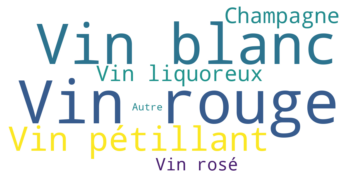

In [96]:
Moyennegmmme = word_counts.to_dict()
wc = WordCloud(width=1200, height=600, background_color='white')

wc.generate_from_frequencies(Moyennegmmme)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>2. Dealing with missing values</b></span>

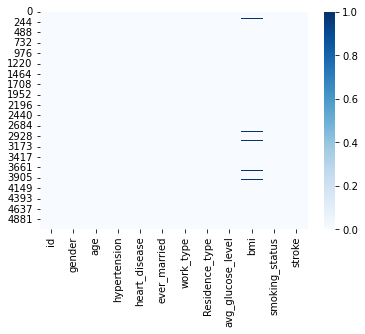

In [12]:
sns.heatmap(data.isnull(),cmap = 'Blues');

***We notice that we have some missing values in the variable bmi***

In [15]:
#sum of missing values per variable.

data.isna().sum()  

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
#filling the  missing values in bmi column with the mean of bmi values

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

data['bmi'] = imp_mean.fit_transform(data['bmi'].values.reshape(-1,1)) 

data.isna().sum()   

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

***We can see that the missing values no longer exist***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>3. Exploratory Data Analysis</b></span>

***The data is hugely biased towards no stroke with a ratio of 19:1***

<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="font-size:20px; font-style:normal"><b>4. Distribution of numerical variables </b></span>

<Figure size 1440x360 with 0 Axes>

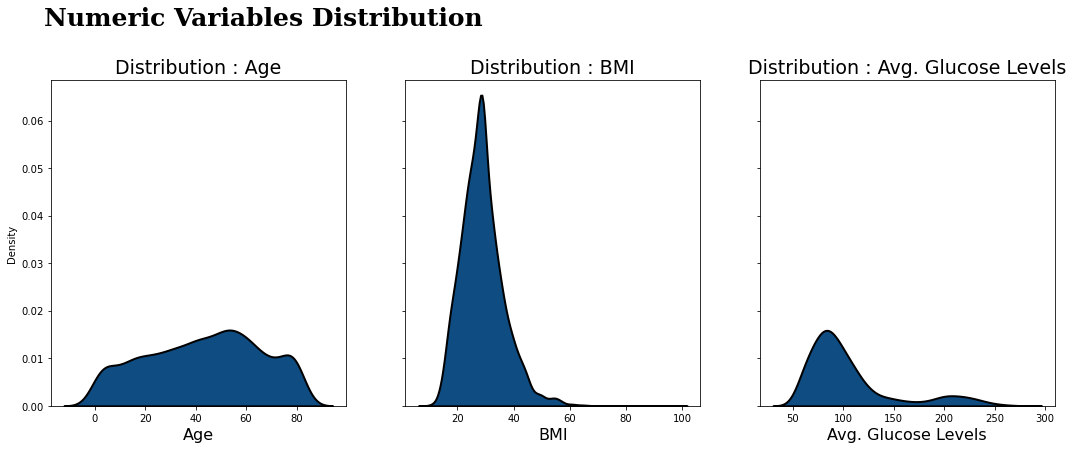

In [21]:
# Plotting the distribution of each of the numerical variables
plt.figure(figsize=(20,5))
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(18, 6))

sns.kdeplot(data['age'], ax=ax1, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax1.set_xlabel('Age', fontsize=16)
ax1.set_title('Distribution : Age', fontsize= 19)

sns.kdeplot(data['bmi'], ax=ax2, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax2.set_xlabel('BMI', fontsize=16)
ax2.set_title('Distribution : BMI', fontsize= 19)

sns.kdeplot(data['avg_glucose_level'], ax=ax3, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
ax3.set_xlabel('Avg. Glucose Levels', fontsize=16)
ax3.set_title('Distribution : Avg. Glucose Levels', fontsize= 19)

ax1.text(-20, 0.08, 'Numeric Variables Distribution', fontsize=25, fontweight='bold', fontfamily='serif')

plt.show()

***We can remarke that :***

* There is a positive skew in BMI and Glucos levels
* The average glucose level has 2 peaks of uneven heights present at values around : 100 & 200
* Bmi is ditributed normally but it has some low values on the right side

**We gained some understanding on the distributions of our numeric variables, but we can add more information to this plot by 
seeing how the distribution of our numeric variables is different for those that have strokes, and those that do not.**

<Figure size 1440x360 with 0 Axes>

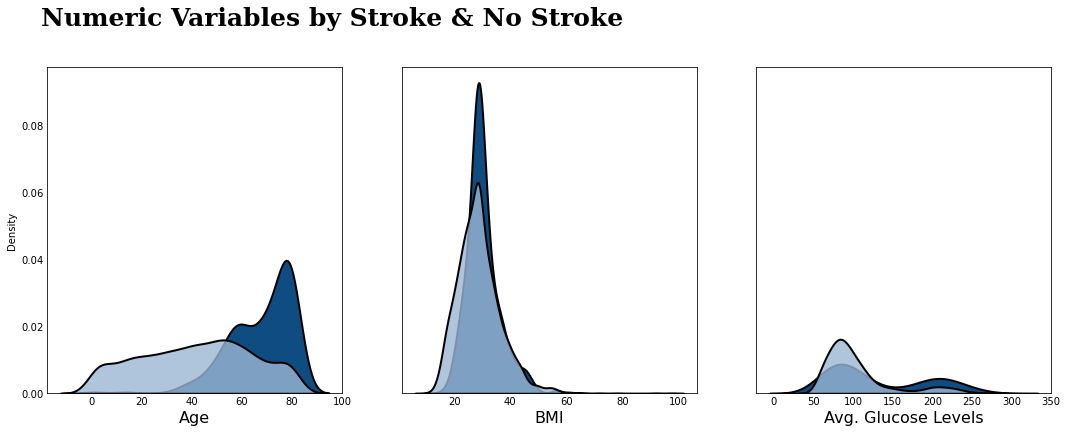

In [23]:
background_color = '#9bb7d4'
plt.figure(figsize=(20,5), facecolor=background_color)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(18, 6))
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)

s = data[data['stroke'] == 1]
ns = data[data['stroke'] == 0]

sns.kdeplot(s['age'], ax = ax1, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(ns['age'], ax = ax1, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax1.set_xlabel('Age', fontsize=16)


sns.kdeplot(s['bmi'], ax = ax2, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(ns['bmi'], ax = ax2, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax2.set_xlabel('BMI', fontsize=16)

sns.kdeplot(s['avg_glucose_level'], ax = ax3, color='#0f4c81',shade=True, linewidth=2, ec='black', alpha=1)
sns.kdeplot(ns['avg_glucose_level'], ax = ax3, color='#9bb7d4',shade=True, linewidth=2, ec='black', alpha=0.8)
ax3.set_xlabel('Avg. Glucose Levels', fontsize=16)

ax1.text(-20, 0.11, 'Numeric Variables by Stroke & No Stroke', fontsize=25, fontweight='bold', fontfamily='serif')

plt.show()

***Looking at plots above, it seems that Age is a big factor in stroke patients, meaning the older you get the more at risk you are.
We can also see differences in Avg. Glucose Levels and BMI, even though it's less obvious.***

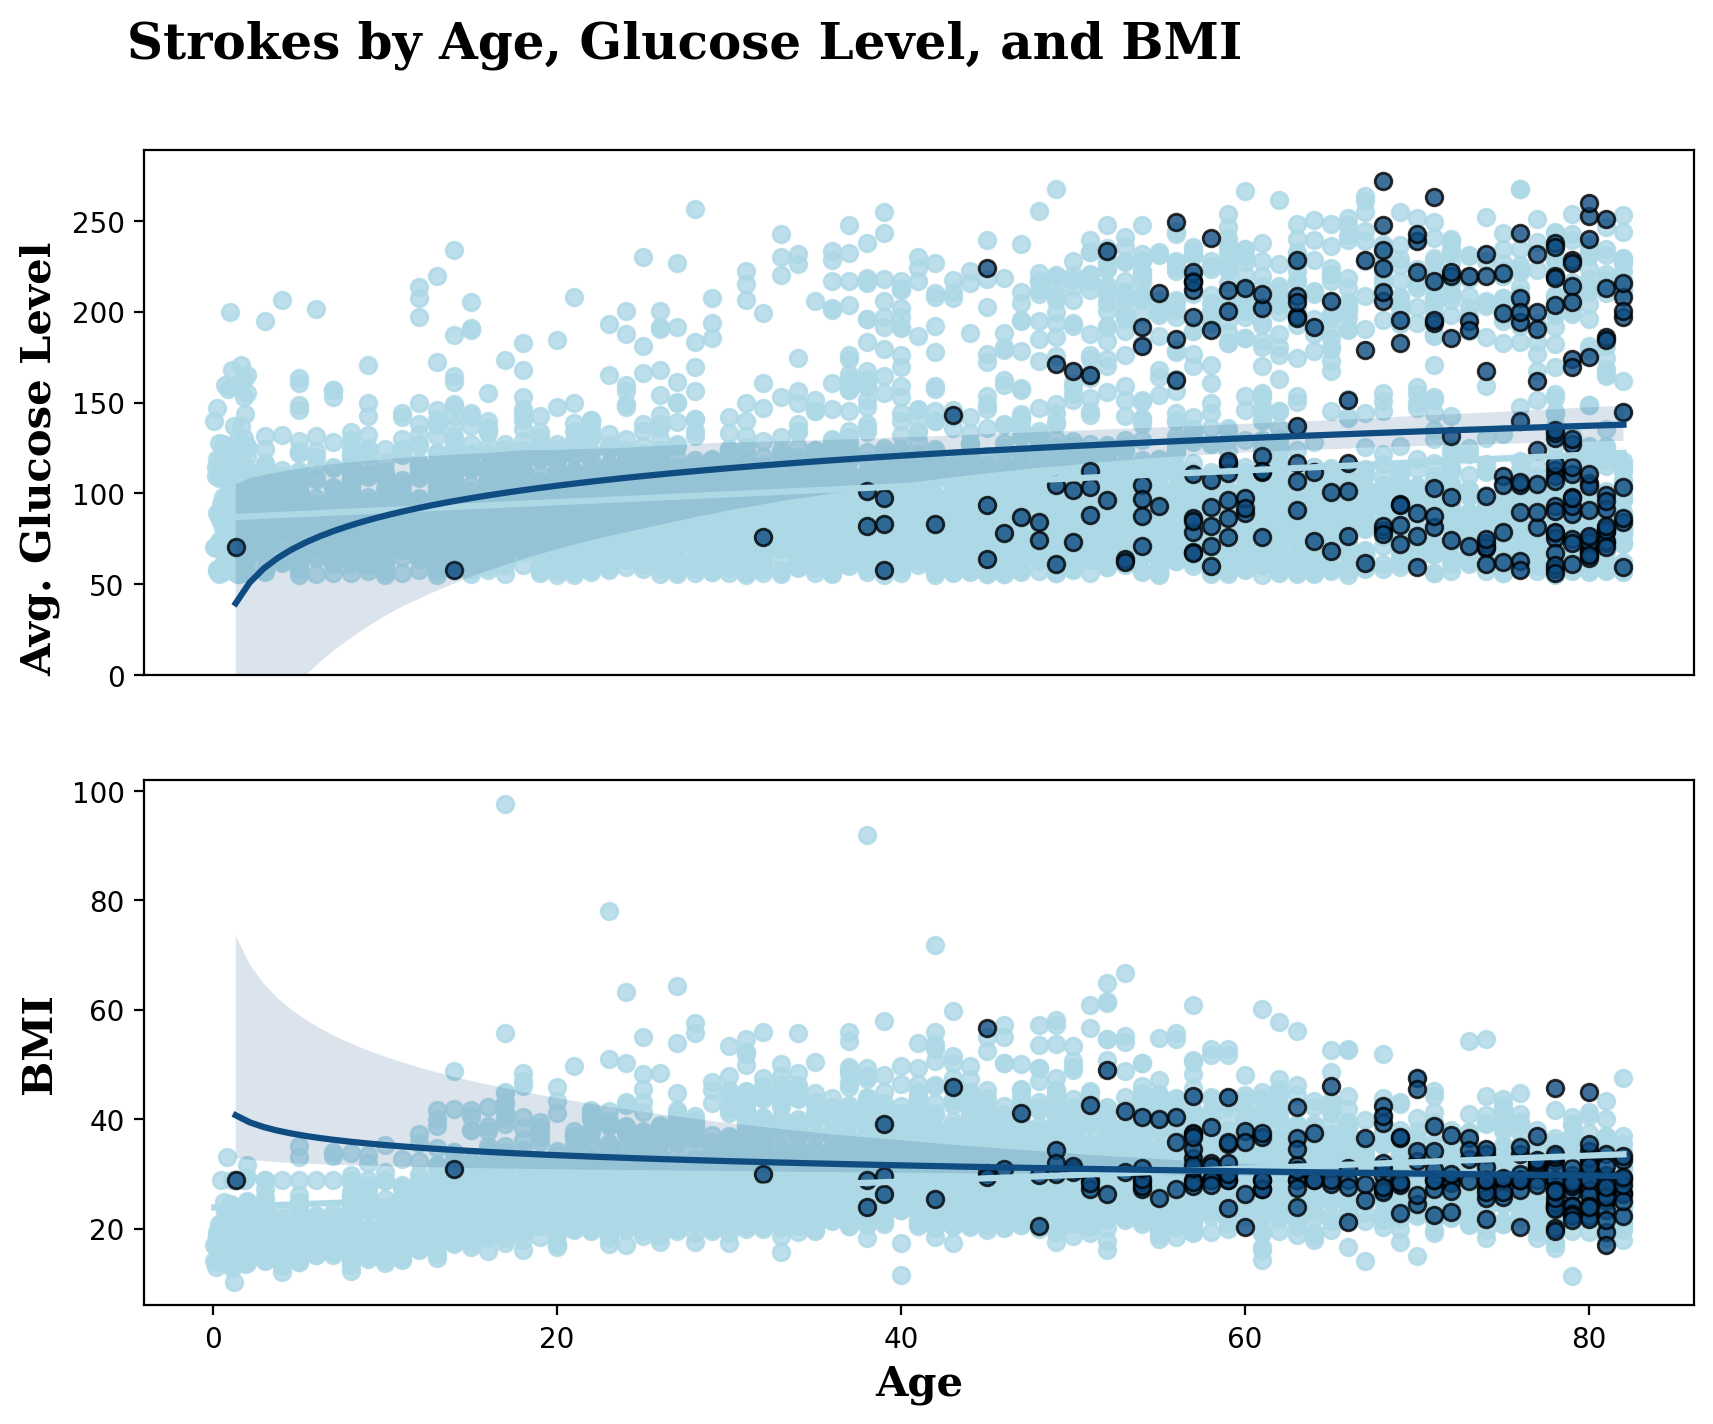

In [25]:
stroke_only = data[data['stroke'] == 1]
no_stroke_only = data[data['stroke'] == 0]


fig = plt.figure(figsize=(10,16),dpi=200) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2]) 


sns.regplot(x = no_stroke_only['age'], y = no_stroke_only['avg_glucose_level'], ax = ax1, color='lightblue')
sns.regplot(x = stroke_only['age'], y = stroke_only['avg_glucose_level'], ax = ax1,
            color='#0f4c81', logx=True,
            scatter_kws={'edgecolors':['black'],
            'linewidth': 1},)


ax1.set(ylim=(0, None))
ax1.set_xlabel("Age",fontsize=12,fontfamily='serif')
ax1.set_ylabel("Avg. Glucose Level",fontsize=15,fontfamily='serif',loc='bottom',fontweight='bold')

ax1.tick_params(axis='x', bottom=False)
ax1.get_xaxis().set_visible(False)

sns.regplot(x = no_stroke_only['age'], y = no_stroke_only['bmi'], ax = ax2, color='lightblue')
sns.regplot(x = stroke_only['age'], y = stroke_only['bmi'], ax = ax2,
            color='#0f4c81', logx=True,
            scatter_kws={'edgecolors':['black'],
            'linewidth': 1},)

ax2.set_xlabel("Age",fontsize=15,fontfamily='serif',loc='center', fontweight='bold')
ax2.set_ylabel("BMI",fontsize=15,fontfamily='serif',loc='center', fontweight='bold')

ax1.text(-5,340,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')

plt.show()

***We can conclude that age is a big factor, and also has slight relationships with BMI & average Glucose levels.
It is intuitive that with the increasing of the age of the patient, the risk of having a stroke increases too, which something we can visualise.***

Text(-3, 0.4, 'Risk of stroke by Age')

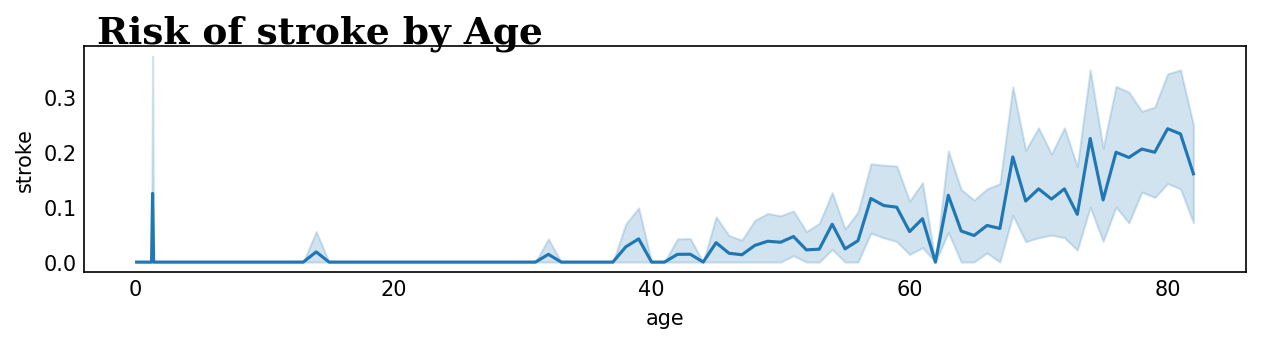

In [27]:
fig = plt.figure(figsize=(10, 5), dpi=150)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
ax1.tick_params(axis=u'both', which=u'both',length=0)

sns.lineplot(x = data['age'],y  = data['stroke'], ax = ax1)

ax1.text(-3,0.4,'Risk of stroke by Age',fontsize=18,fontfamily='serif',fontweight='bold')

***We can see clearly that as the age increases, the risk of having a stroke also increases***

In [29]:
dt = data

Now, we have delect thoses datas "NA", let's see what's the repartition of these sample  
I want to know what is the distribution of gender durling the people who got thee troke.

In [30]:
(dt1[dt1["stroke"] == 1]["gender"] == "Male").value_counts()[0:2]

False    141
True     108
Name: gender, dtype: int64

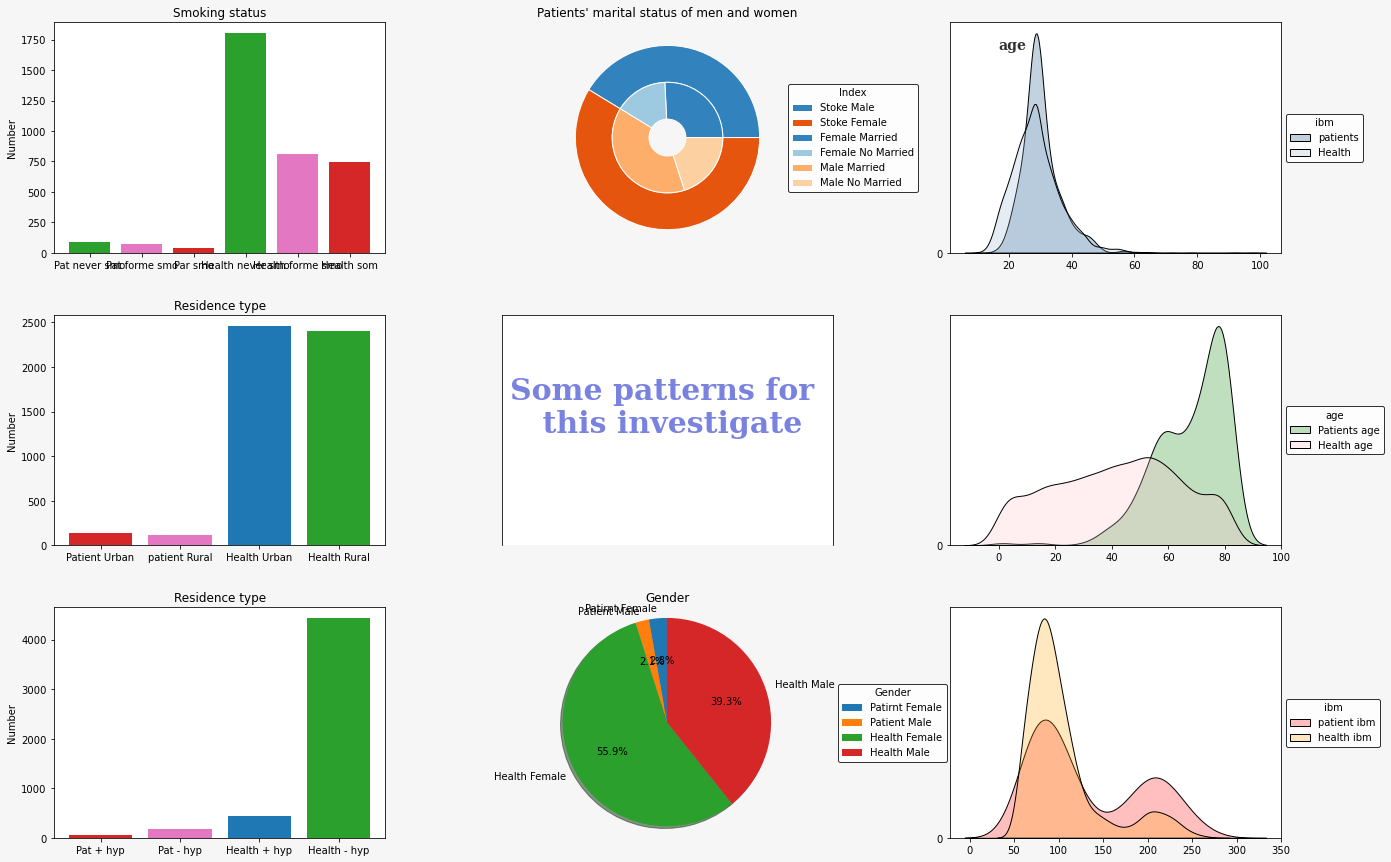

In [31]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color

###########################
#SSN = Stroke Smoke Never
#SSF = Stroke Smoke fprmerly
#SSS = Stroke Smoke Souvent
#HSN = Health Smoke Never
#HSF = Health Smoke fprmerly
#HSS = Health Smoke Souvent

SSN = len(dt1[(dt1.stroke == 1) & (dt1.smoking_status == "never smoked")])
SSF = len(dt1[(dt1.stroke == 1) & (dt1.smoking_status == "formerly smoked")])
SSS = len(dt1[(dt1.stroke == 1) & (dt1.smoking_status == "smokes")])
HSN = len(dt1[(dt1.stroke == 0) & (dt1.smoking_status == "never smoked")])
HSF = len(dt1[(dt1.stroke == 0) & (dt1.smoking_status == "formerly smoked")])
HSS = len(dt1[(dt1.stroke == 0) & (dt1.smoking_status == "smokes")])

labels0 = ['Pat never smo', 'Pat forme smo', 'Par smo', 'Health never smo','Health forme smo', 'Health som']
place = [SSN,SSF,SSS,HSN,HSF,HSS]
bar_colors = ['tab:green', 'tab:pink', 'tab:red', 'tab:green', 'tab:pink', 'tab:red']

ax0.bar(labels0, place, label=labels0, color=bar_colors)
ax0.set_ylabel('Number')
ax0.set_title('Smoking status')

###########################
#Mn = Male no married      SMn = Stroke Male no married
#MM = Male married         SMM = Stroke Male married
#Fn = Female no married    SFn = Stroke Female no married
#FM = Female married       SFM = Stroke Female married

Mn = dt1[(dt1.gender == "Male") & (dt1.stroke == 1) & (dt1.ever_married=="No")].count()[1]
MM = dt1[(dt1.gender == "Male") & (dt1.stroke == 1) & (dt1.ever_married=="Yes")].count()[1]
Fn = dt1[(dt1.gender == "Female") & (dt1.stroke == 1) & (dt1.ever_married=="No")].count()[1]
FM = dt1[(dt1.gender == "Female") & (dt1.stroke == 1) & (dt1.ever_married=="Yes")].count()[1]
Mn = dt1[(dt1.gender == "Male") & (dt1.stroke == 0) & (dt1.ever_married=="No")].count()[1]
MM = dt1[(dt1.gender == "Male") & (dt1.stroke == 0) & (dt1.ever_married=="Yes")].count()[1]
Fn = dt1[(dt1.gender == "Female") & (dt1.stroke == 0) & (dt1.ever_married=="No")].count()[1]
FM = dt1[(dt1.gender == "Female") & (dt1.stroke == 0) & (dt1.ever_married=="Yes")].count()[1]

labels1 = ('Stoke Male', 'Stoke Female', 'Female Married', 'Female No Married' , 'Male Married', 'Male No Married',
           'Health Male', 'Health Female', 'Female Married', 'Female No Married' , 'Male Married', 'Male No Married')
#fig, ax1 = plt.subplots()

size = 0.4
vals = np.array([[MM, Mn], [FM, Fn]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([0, 2, 6, 7])

ax1.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title="Patients' marital status of men and women")
ax1.legend(labels1, title="Index",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")


####################################
labels2 = ['patients','Health']
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(dt1[(dt1.stroke == 1)])
negative = pd.DataFrame(dt1[(dt1.stroke == 0)])
sns.kdeplot(positive["bmi"], ax=ax2,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax2, color="#9bb7d4",ec='black', shade=True, label="negative")
#ax2.text(-0.06, 0.09, 'BMI',fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.legend(labels2, title="ibm",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")

###################################
#SResiU = Stroke residence in Urban #SResiR = Stroke residence in Rural
#HResiU = Health residence in Urban #HResiR = Health residence in Rural

SResiU = len(dt1[(dt1.stroke == 1) & (dt1.Residence_type == 'Urban')])
SResiR = len(dt1[(dt1.stroke == 1) & (dt1.Residence_type == 'Rural')])
HResiU = len(dt1[(dt1.stroke == 0) & (dt1.Residence_type == 'Urban')])
HResiR = len(dt1[(dt1.stroke == 0) & (dt1.Residence_type == 'Rural')])

labels2 = ['Patient Urban', 'patient Rural', 'Health Urban', 'Health Rural']
place = [SResiU, SResiR, HResiU, HResiR]
bar_colors = ['tab:red', 'tab:pink', 'tab:blue', 'tab:green']

ax3.bar(labels2, place, label=labels2, color=bar_colors)
ax3.set_ylabel('Number')
ax3.set_title('Residence type')

####################################
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Some patterns for \n this investigate', horizontalalignment='center', verticalalignment='center',
         fontsize=30, fontweight='bold', fontfamily='serif', color="#7A82E0")


####################################
labels5 = ['Patients age', 'Health age']
ax5.grid( linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(dt1[(dt1.stroke == 1)])
negative = pd.DataFrame(dt1[(dt1.stroke == 0)])
sns.kdeplot(positive["age"], ax=ax5,color="green", ec='black',shade=True, label="positive")
sns.kdeplot(negative["age"], ax=ax5, color="pink",ec='black', shade=True, label="negative")
ax5.text(-0.06, 0.09, 'age',fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')
ax5.legend(labels5, title="age",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")

####################################

Shypertension = len(dt1[(dt1.stroke == 1) & (dt1.hypertension == 1)])
SNhy = len(dt1[(dt1.stroke == 1) & (dt1.hypertension == 0)])
Phypertension = len(dt1[(dt1.stroke == 0) & (dt1.hypertension == 1)])
PNhy = len(dt1[(dt1.stroke == 0) & (dt1.hypertension == 0)])

labels3 = ['Pat + hyp', 'Pat - hyp', 'Health + hyp', 'Health - hyp']
place = [Shypertension, SNhy, Phypertension, PNhy]
bar_colors = ['tab:red', 'tab:pink', 'tab:blue', 'tab:green']

ax6.bar(labels3, place, label=labels2, color=bar_colors)
ax6.set_ylabel('Number')
ax6.set_title('Residence type')

#######################################

labels = 'Patirnt Female', 'Patient Male', 'Health Female','Health Male'

sizes = [(dt1[dt1["stroke"] == 1]["gender"] == "Male").value_counts()[0], 
         (dt1[dt1["stroke"] == 1]["gender"] == "Male").value_counts()[1],
         (dt1[dt1["stroke"] == 0]["gender"] == "Male").value_counts()[0],
         (dt1[dt1["stroke"] == 0]["gender"] == "Male").value_counts()[1]]
#explode = (0, 0)
ax7.set_title("Gender")
ax7.pie(sizes ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax7.axis('equal') 
#plt.title("\nStroke Patient's Gender",fontsize=25)
ax7.legend(labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")

######################################
labels8 = 'patient ibm', 'health ibm'
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(dt1[(dt1.stroke == 1)])
negative = pd.DataFrame(dt1[(dt1.stroke == 0)])
sns.kdeplot(positive["avg_glucose_level"], ax=ax8,color="red", ec='black',shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax8, color="orange",ec='black', shade=True, label="negative")
#ax8.text(-0.06, 0.09, 'avg_glucose_level',fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax8.set_ylabel('')    
ax8.set_xlabel('')
ax8.legend(labels8, title="ibm",loc="center left",bbox_to_anchor=(1, 0,0.5,1), edgecolor = "black")

plt.show()

## Reminder the expression of the correlation:

$$cor(x_i,y_i)=\frac{\frac{1}{n} \sum_{i=1}^n (x- \bar x_i)(y_i -\bar Y)}{\sqrt{s_x^2S_y^2}}$$

In [32]:
dt1.loc[:, ~dt1.columns.isin(['id'])].corr()["stroke"]
dtcr = dt1.loc[:, ~dt1.columns.isin(['id'])].corr()
print(dtcr)

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.325942      0.160189       0.038899           0.168751   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.325942  0.245257  
hypertension       0.160189  0.127904  
heart_disease      0.038899  0.134914  
avg_glucose_level  0.168751  0.131945  
bmi                1.000000  0.038947  
stroke             0.038947  1.000000  


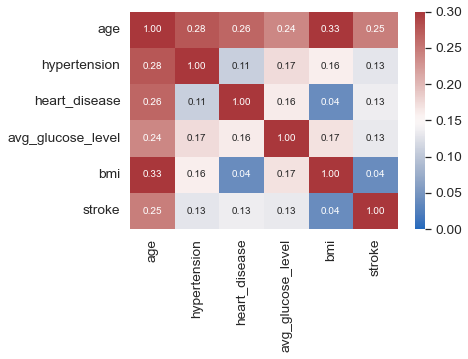

In [33]:
k = 6 #number of variables for heatmap
#cm = np.corrcoef(dtcr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(dtcr, vmax=0.3, vmin=0, annot=True,  cmap='vlag',
                 fmt='.2f', annot_kws={'size': 10})
plt.show()

In [34]:
SResiU = len(dt1[(dt1.stroke == 1) & (dt1.Residence_type == 'Urban')])
SResiR = len(dt1[(dt1.stroke == 1) & (dt1.Residence_type == 'Rural')])
PResiU = len(dt1[(dt1.stroke == 0) & (dt1.Residence_type == 'Urban')])
PResiR = len(dt1[(dt1.stroke == 0) & (dt1.Residence_type == 'Rural')])

ttype = ['Patient Urban', 'patient Rural', 'People Urban', 'People Rural']
place = [SResiU, SResiR, PResiU, PResiR]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax3.bar(ttype, place, label=bar_labels, color=bar_colors)
ax3.set_ylabel('fruit supply')
ax3.set_title('Fruit supply by kind and color')
ax3.legend(title='Fruit color')

plt.show()

In [29]:
########################### 
#the patients sign & health & a little fat & fat
#Sbmi1= len(dt1[(dt1.stroke == 1) & (dt1.bmi < 18.4)])
#Sbmi2= len(dt1[(dt1.stroke == 1) & (dt1.bmi >= 18.4) & (dt1.bmi < 23.9)])
#Sbmi3= len(dt1[(dt1.stroke == 1) & (dt1.bmi >= 23.9) & (dt1.bmi < 27.9)])
#Sbmi4= len(dt1[(dt1.stroke == 1) & (dt1.bmi >= 27.9)])

#the normal person's sign & health & a little fat & fat
#bmi1= len(dt1[(dt1.stroke == 0) & (dt1.bmi < 18.4)])
#bmi2= len(dt1[(dt1.stroke == 0) & (dt1.bmi >= 18.4) & (dt1.bmi < 23.9)])
#bmi3= len(dt1[(dt1.stroke == 0) & (dt1.bmi >= 23.9) & (dt1.bmi < 27.9)])
#bmi4= len(dt1[(dt1.stroke == 0) & (dt1.bmi >= 27.9)])

#Strokebmi = np.array([Sbmi1, Sbmi2, Sbmi3, Sbmi4])
#Nostrokebmi = np.array([bmi1, bmi2, bmi3, bmi4])
#labels2 = ['Lean', 'Normal', 'Fat', 'Too Fat']

109

We have see that there hasn't the correlation about "gender", "ever married", "work type", and "smoking status", which means that this corrélation don't make any sens when it is a "objectif"